# Fraud Detection

In [28]:
import h2o
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import pandas as pd
import os
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator

## Inicializando server H2O

In [29]:
h2o.init(max_mem_size = 2)
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,2 hours 26 mins
H2O cluster timezone:,America/Regina
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.6
H2O cluster version age:,9 days
H2O cluster name:,H2O_from_python_Gomobil_f7jcu0
H2O cluster total nodes:,1
H2O cluster free memory:,1.414 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


## Cargando dataset utilizando los data frames de Pandas

In [30]:
creditData = pd.read_csv(r"C:\Users\Gomobil\Downloads\creditcard.csv")
creditData.describe() 
# Utilizando H2O
# creditData_df = h2o.import_file(r"C:\Users\Gomobil\Downloads\creditcard.csv") 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [31]:
creditData.shape

(284807, 31)

### Buscando null values

In [32]:
creditData.isnull().values.any()

False

## Plotting 

Parse progress: |█████████████████████████████████████████████████████████| 100%


Text(0, 0.5, 'Frequency')

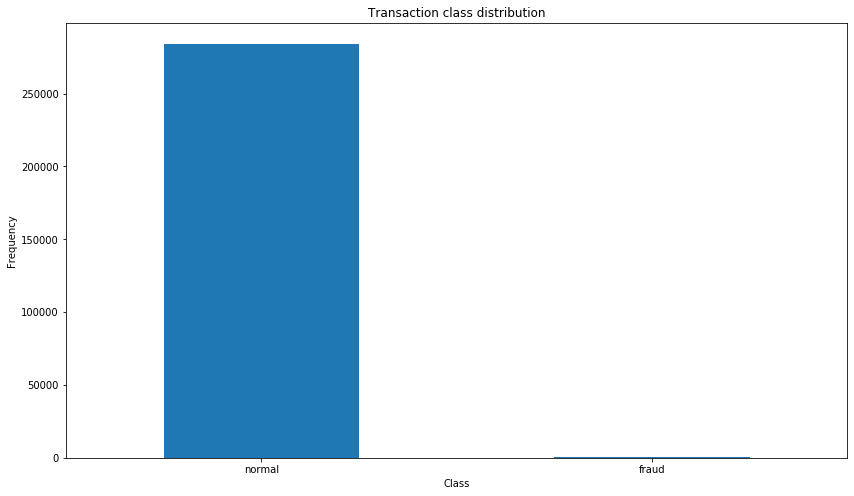

In [33]:
creditData_h2o = h2o.H2OFrame(creditData)
labels = ['normal','fraud']
classes = pd.value_counts(creditData['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

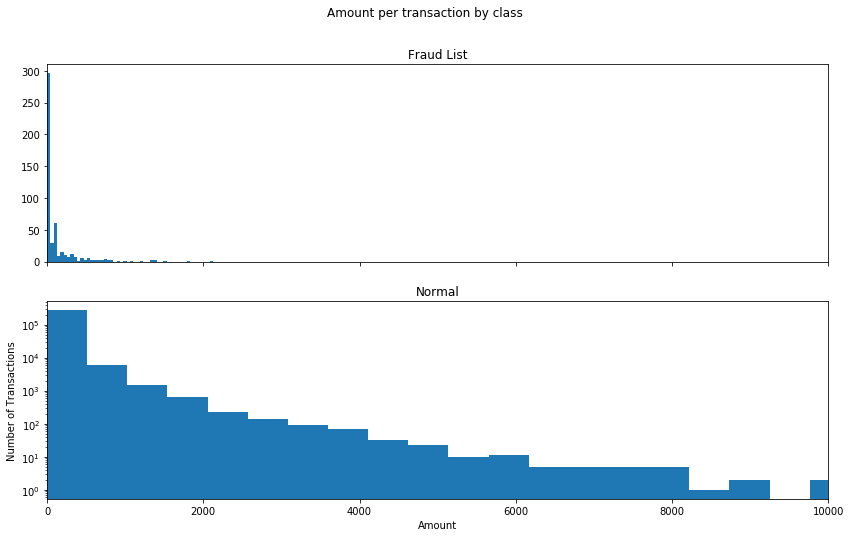

In [34]:
fraud = creditData[creditData.Class == 1]
normal = creditData[creditData.Class == 0]
f, (ax1, ax2) = plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transaction by class')

ax1.hist(fraud.Amount, bins = 50)
ax1.set_title('Fraud List')

ax2.hist(normal.Amount, bins = 50)
ax2.set_title('Normal')

plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 10000))
plt.yscale('log')
plt.show()

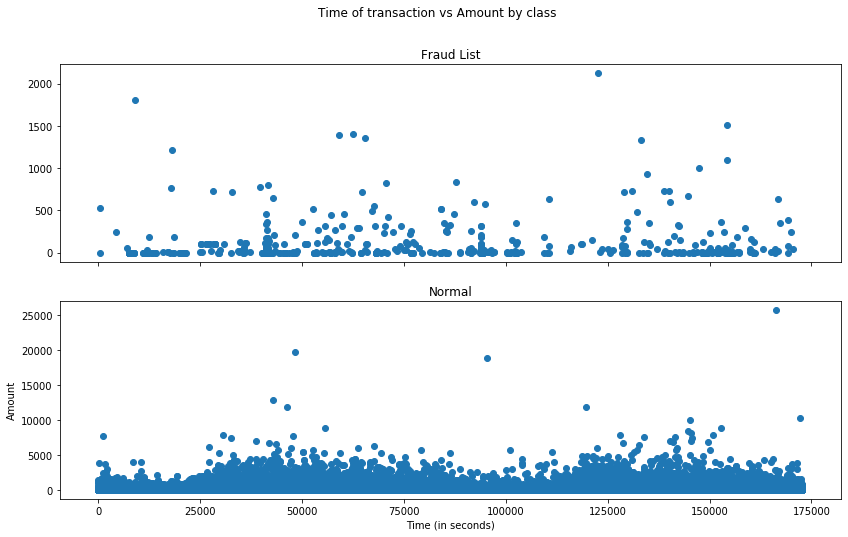

In [35]:
# Time vs Amount
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud List')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.show()

## Plotting considerando clases

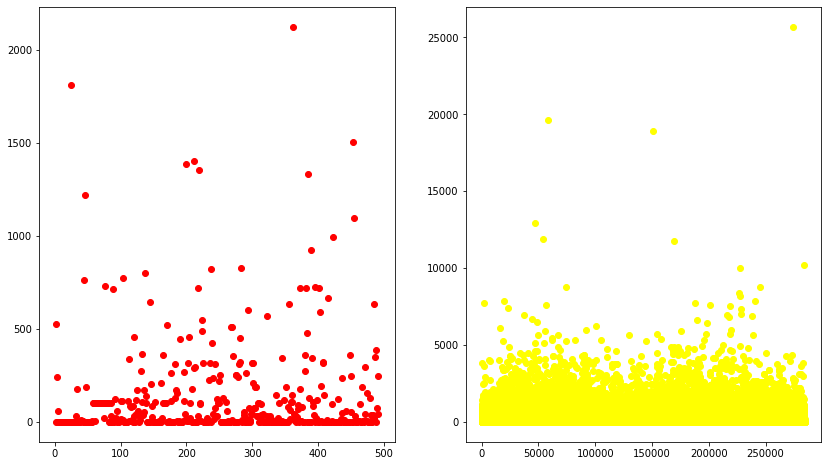

In [36]:
color = {1:'red', 0:'yellow'}
fraudlist = creditData[creditData.Class == 1]
normal = creditData[creditData.Class == 0]
fig, axes = plt.subplots(1,2)

axes[0].scatter(list(range(1, fraudlist.shape[0] + 1)),
               fraudlist.Amount, color='red')
axes[1].scatter(list(range(1, normal.shape[0] + 1)),
               normal.Amount, color='yellow')
plt.show()


In [37]:
features = creditData_h2o.drop(['Time'], axis = 1)

In [38]:
train, test = features.split_frame([0.8])
print(train.shape)
print(test.shape)

(228018, 30)
(56789, 30)


In [39]:
train_df = train.as_data_frame()
test_df = test.as_data_frame()

train_df = train_df[train_df['Class'] == 0]
train_df = train_df.drop(['Class'], axis = 1)

Y_test_df = test_df['Class']
test_df = test_df.drop(['Class'], axis = 1)

train_df.shape

(227624, 29)

## Model Building

In [40]:
train_h2o = h2o.H2OFrame(train_df)  # Conversion a frame de h2o
test_h2o = h2o.H2OFrame(test_df)
x= train_h2o.columns

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [41]:
anomaly_model = H2ODeepLearningEstimator(activation = "Tanh",
                                        hidden = [14, 7, 7, 14],
                                        epochs = 100,
                                        standardize = True,
                                        stopping_metric = 'MSE',
                                        loss = 'automatic',
                                        train_samples_per_iteration = 32,
                                        shuffle_training_data = True,
                                        autoencoder = True,
                                        l1 = 10e-5)
anomaly_model.train(x=x, training_frame = train_h2o)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


## Model Evaluation

In [42]:
anomaly_model._model_json['output']['variable_importances'].as_data_frame()

,variable,relative_importance,scaled_importance,percentage
0,V18,1.000000,1.000000,0.214864
1,V15,0.825216,0.825216,0.177309
2,V24,0.800455,0.800455,0.171989
3,V13,0.682040,0.682040,0.146546
4,V26,0.645306,0.645306,0.138653
5,V11,0.598881,0.598881,0.128678
6,V19,0.087396,0.087396,0.018778
7,V12,0.003215,0.003215,0.000691
8,V4,0.002294,0.002294,0.000493
9,V9,0.001605,0.001605,0.000345


### Visualization

[1.0, 0.8252162933349609, 0.8004552125930786, 0.6820398569107056, 0.6453059911727905, 0.5988807678222656, 0.08739595860242844, 0.003215301549062133, 0.002294168109074235, 0.001605475670658052, 0.0013672786299139261, 0.0007153809419833124, 0.0005047054146416485, 0.0005024477140977979, 0.0005020562093704939]


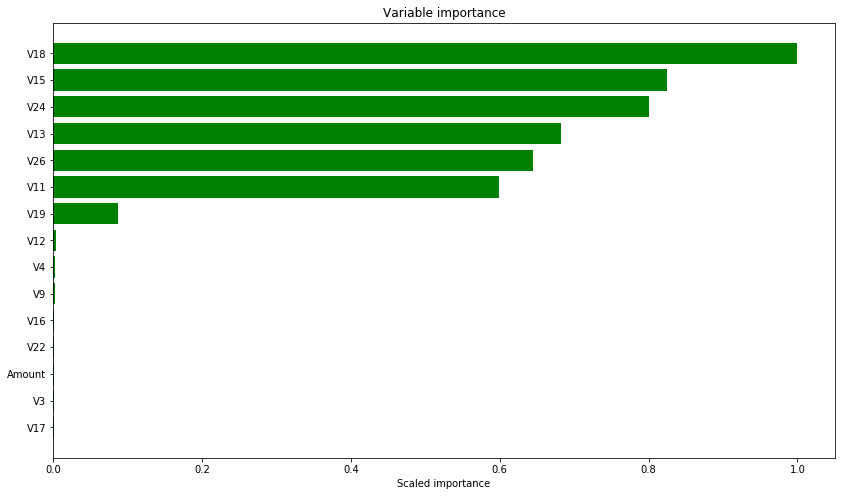

In [43]:
rcParams['figure.figsize'] = 14, 8
fig, ax = plt.subplots()

variables = anomaly_model._model_json['output']['variable_importances']['variable']
var = variables[0:15]
y_pos = np.arange(len(var))

scaled_importance = anomaly_model._model_json['output']['variable_importances']['scaled_importance']
sc = scaled_importance[0:15]
print(sc)

ax.barh(y_pos, sc, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled importance')
ax.set_title('Variable importance')
plt.show()

## Plotting the loss

Text(0.5, 0, 'epoch')

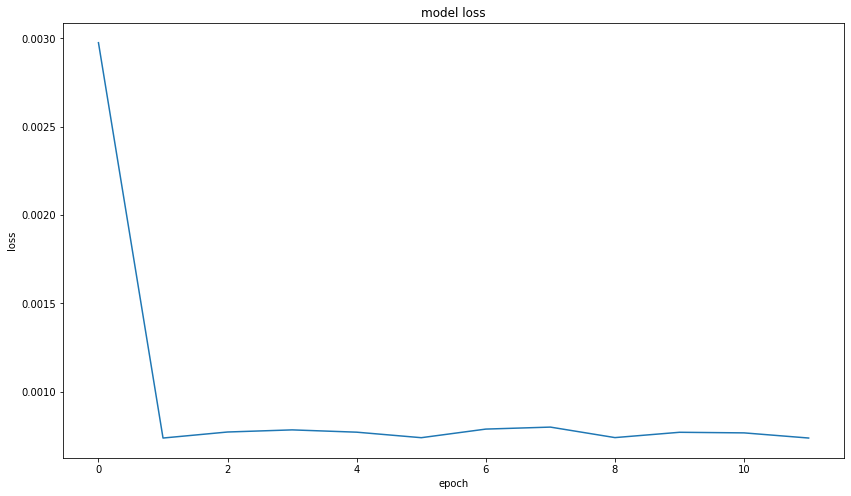

In [44]:
scoring_history = anomaly_model.score_history()
%matplotlib inline
rcParams['figure.figsize'] = 14, 8
plt.plot(scoring_history['training_mse'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

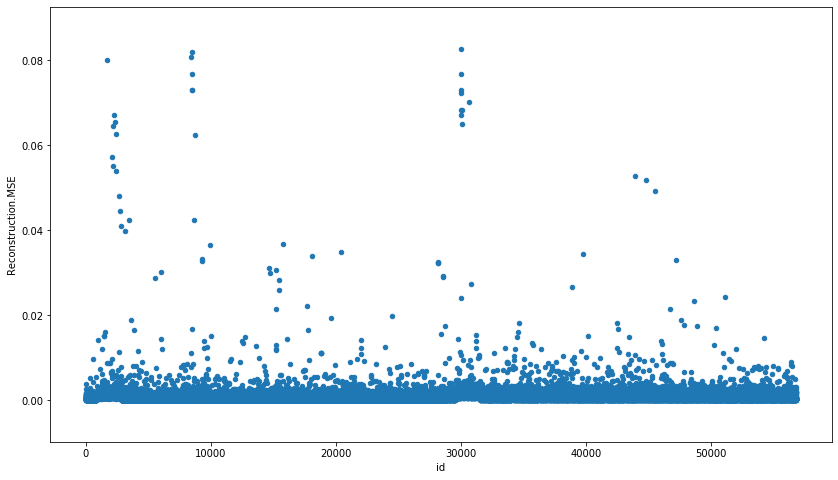

In [45]:
test_rec_error = anomaly_model.anomaly(test_h2o)
# Anomaly es una funcion de H2O que calcula el error para el dataset

# Convertimos a dataframes de pandas
test_rec_error_df = test_rec_error.as_data_frame()

# Testing dataset vs error
test_rec_error_df['id']=test_rec_error_df.index
rcParams['figure.figsize'] = 14, 8
test_rec_error_df.plot(kind="scatter", x="id", y="Reconstruction.MSE")
plt.show()

In [46]:
predictions = anomaly_model.predict(test_h2o)
error_df = pd.DataFrame({'reconstruction_error': test_rec_error_df['Reconstruction.MSE'], 'true_class': Y_test_df})
error_df.describe()

deeplearning prediction progress: |███████████████████████████████████████| 100%


,reconstruction_error,true_class
count,56789.000000,56789.000000
mean,0.000783,0.001726
std,0.001862,0.041506
min,0.000048,0.000000
25%,0.000298,0.000000
50%,0.000498,0.000000
75%,0.000877,0.000000
max,0.082780,1.000000


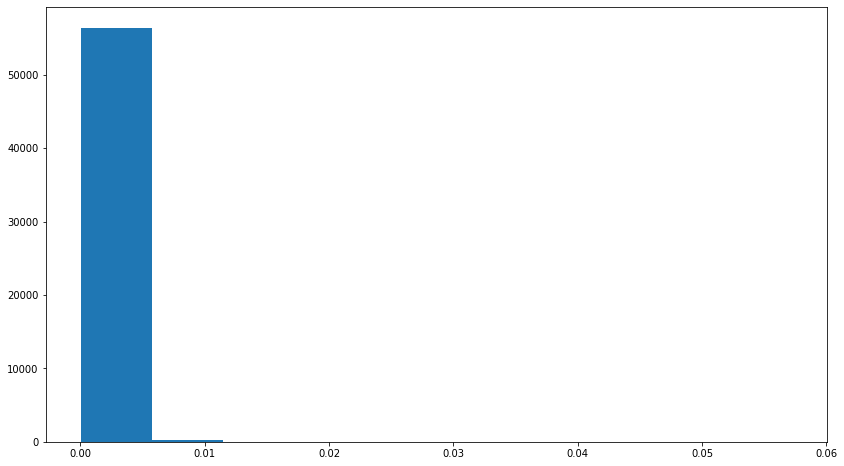

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)
rcParams['figure.figsize'] = 14, 8
normal_error_df = error_df[(error_df['true_class'] == 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

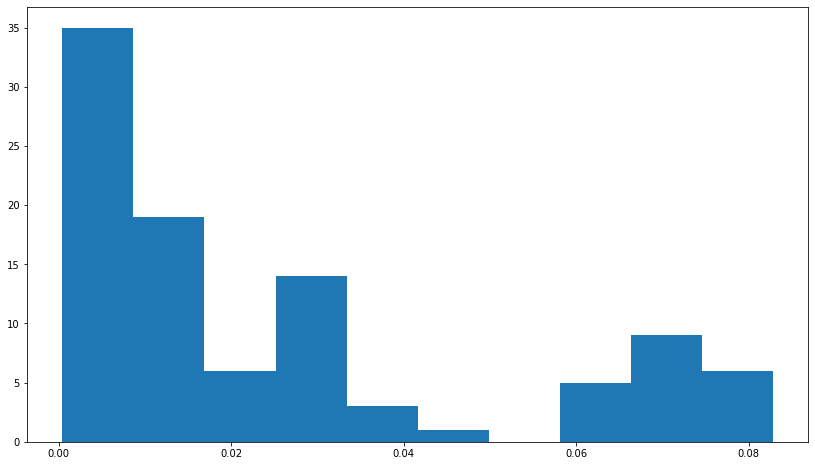

In [48]:
# Reconstruction error for fraud detections
fig = plt.figure()
ax = fig.add_subplot(111)
rcParams['figure.figsize'] = 14, 8
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins = 10)

 ## ROC Curve


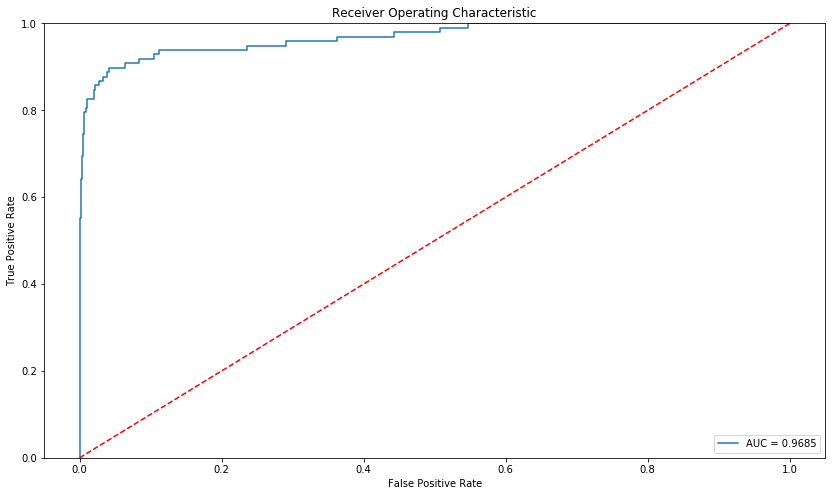

In [49]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report,
                            f1_score, precision_recall_fscore_support)
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
#plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

## Precision & Recall

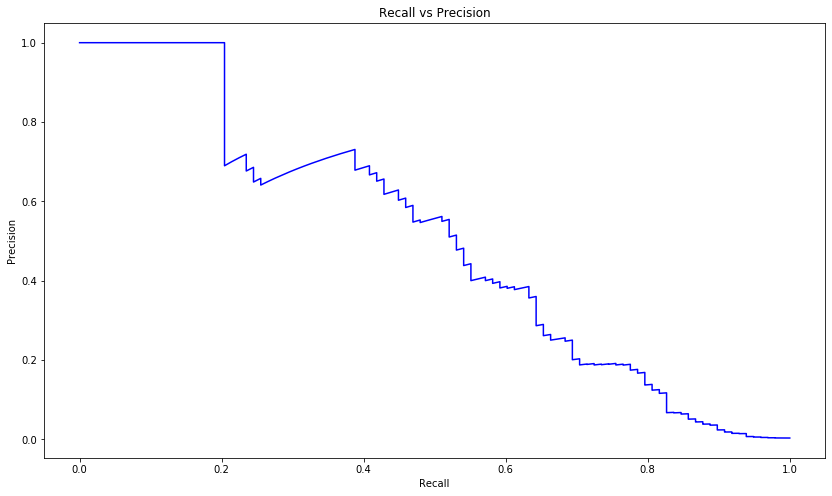

In [50]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

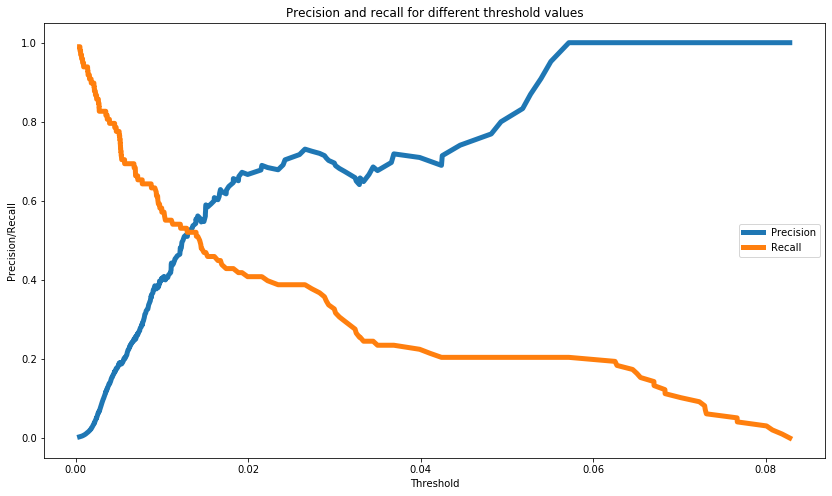

In [51]:
plt.plot(th, precision[1:], label="Precision", linewidth=5)
plt.plot(th, recall[1:], label="Recall", linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

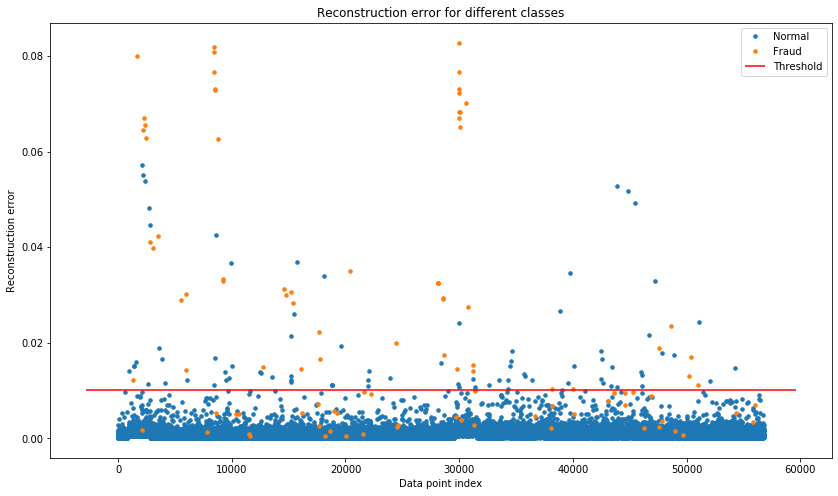

In [54]:
threshold = 0.01
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='', label='Fraud' if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()